# Week 1 MLC Math

In [0]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


I'm just going to introduce to you some of the basic terminology and a little bit of math this lesson.

### Definitions of Machine Learning
“Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed”

&#150; Arthur L. Samuel, AI pioneer, 1959

Well-posed Learning Problem: A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. 

&#150; Tom Mitch, 1998

For example playing a game of chess, E would be games played, T would be the task of playing chess and P could be winrate or probability of winning.

The goal in machine learning is to have the computer do the hard work of making good predictions by creating a model like a linear model or a neural network as creating a model. A neural networks could generate a multivaraible polynomial function.

## Supervised Learning vs Unsupervised Learning
The distinction is indicated by what kind of **dataset** you are working with. <br>
### Definition of supervised learning:
In supervised learning the dataset has previous data that also contains the solution a classic example is housing prices. e.g. a dataset has house _features_ like number of bathrooms, size of garage and square meters and the _target variable_ we are trying to predict the expected house value.
i.e. "The right answers are given in the dataset".
There are two different types of supervised algorithms:

**Regression**: your model is a continuous function and outputs a number e.g. house prices based on different-values.

**Classification**: your model outputs a discrete value. e.g. whether or not you are likely to pass/fail a test. 
### Definition of unsupervised learning:
Unsupervised learning is used when we don't know what the results should look like. It is useful in helping find structure in data. Unsupervised datasets don't contain the result we are looking for. Good examples are:

&#150; Twitter data you will find certain users have their own social circles by looking at topics that they talk about  

&#150; Social networking

&#150; Analysing markets

&#150; K-means



# Single Variable Linear Regression

The first learning algorithm we are going to introduce is linear regression. Quite simply it is fiting a line to some data, as the name indicates this is a **regression** problem which means our model generates a continuous function (a line).

### Creating some training data
Were going to make some data so we don't have to import files and can get right into it. If your having problem try rerunning the entire notebook. 
 

## Normalisation

A common technique in machine learning is feature scaling and feature normalisation where you try to get all the values in the same range:
i.e. $-1<x<1$


$x_{norm}=\frac{x-\mu}{x_{max}-x_{min}}$


(100, 1)
(100, 1)


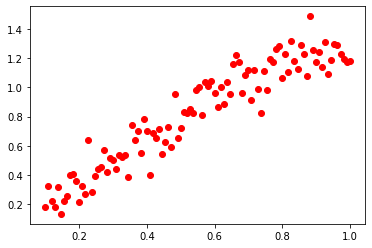

In [297]:
# Linspace is a numpy function for creating equally space points so 100 points between 1 and 100 
# It's like like start stop step but the step values changes.
# np.newaxis just adds a dimension
data_x = np.linspace(1, 10, 100)[:, np.newaxis]

# Here we are simulating some real world data by having a function that'll have be sort of linear
# and will be linear
data_y = np.sin(0.15*data_x) + 0.01*np.power(data_x,1.5)+0.1*np.random.randn(100, 1)

data_x = data_x/np.max(data_x)   # This is normalisation and just makes it run better

print(data_y.shape)
print(data_x.shape)

plt.plot(data_x, data_y, 'ro')
plt.show()

## Current Goal: We Want to Create a Linear Model of The Data
We want to fit a line to the data.

Below I eyeball creating a linear model for this data a line that goes between $(0,0.1)$  and $(10,1.55)$. 

Doing some basic algerbra I determine that my hypothosis is 

$y= (\frac{1.55-0.1}{1-0}) x+0.1$

But how could we know that this is the best line we can fit? And how could we get a computer to do it?

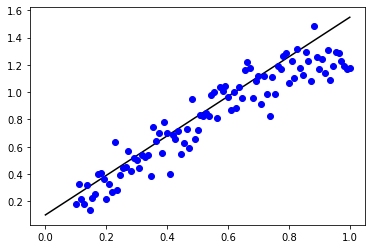

In [298]:
# Eyeballing the plot
plt.plot([0,1], [0.1,1.55], '-k')
plt.plot(data_x, data_y, "bo")
plt.show()

In [0]:
# This code is just to make a table of some of the data

# Makes numpy array that is [data_x|data_y]

data = np.vstack((data_x.T, data_y.T)).T   
df = pd.DataFrame(data, columns=['x','y'])

## Terminology Used With Data

$x^{(i)}$ is an "input" variable and $y^{(i)}$ is a "output" or "target" variable

A matrix containing all the input variables would be denoted by $X$ likewise $Y$ denotes a matrix of target variables.


A training example would be $(x^{(i)},y^{(i)}).$

e.g. $(x^{(2)},y^{(2)})=(1.181818, 0.211290)$

Note that $x^{(i)}$ isn't read as x to the power of but rather the i'th element and is the index not an exponential.

## Regression Modelling Representation
Our goal is to generate a function $h$ such that $h:X \rightarrow Y$ which can also be read as $h(X)=Y$.
Where $h$ is the hypothosis generated by our learning algorithm.

The data is split into a training and test set.

The training data is used to train the algorithm and the test set is used in testing the algorithm to find the accuracy.

A typical split of the data is 80%/20% training/test respectively. 

We use a test set to see if our model wasa simply just memorising the training set.



## Making a Linear Hypothosis

As we know we are just making a linear hypothosis we know that it will look like this:

$y=mx+c$

In the machine learning field we'd write the hypothosis as followed:

$h_\theta(x)=\theta_0+\theta_{1}x$

$h_\theta(x)$ should be read as our hypothosis defined by parameters $\theta_{(i)}$

Our learning algorithm can only change the parameters ($\theta$) in making it's hypothosis. 

This is just the terminology used that can be used in almost all learning algorithms so get used to it.

### How Do We Choose the Parameters?
We know we want to choose parameters so that our hypothosis values are as close as possible to our training values but for all values in our training set.

So expressing this mathematically 

$\underset{\theta_0,\ \theta_1}{\operatorname{min}}(h_\theta(x^{(i)})-y^{(i})$

This expression is incomplete as we want to minimise the total error for all training examples so

$\underset{\theta_0,\ \theta_1}{\operatorname{min}} \sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

Where $m$ is the total number of training examples.
Commonly writen as:

$\underset{\theta_0,\ \theta_1}{\operatorname{min}}\frac{1}{2m} \sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

The $\frac{1}{2m}$ this constant is to make the math easier the $1/m$ comes from getting the average error and the $1/2$ is added as it removes a constant and makes the math a little be easier (hint: it has something to do with taking the derivative of the cost function)

By convention cost functions usually have the symbol $J$ so:

$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

Note: This isn't the only cost function for linear regression you could also use the least absolute deviations but least squares is more commonly used as it penalises the algorithm more if there is a point really far away and the maths is easier.


## Minimising the Cost Function (Gradient Descent)
Gradient descent is used everywhere in machine learning.

We want $\underset{\theta_0,\ \theta_1}{\operatorname{min}}J(\theta_0, \theta_1)$

To find this we are going to start with some values for the parameters and then we are going to modify the parameters untill we end up at the minimum for $J(\theta_0, \theta_1)$.

Imagine we knew all the values for $J(\theta_0, \theta_1)$

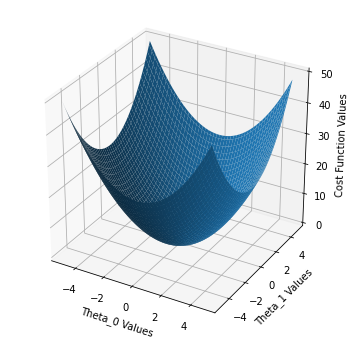

In [300]:
## This needs to be cleaned up

from mpl_toolkits.mplot3d import axes3d

%matplotlib inline


x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x,y)
Z = X**2 +Y**2

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# Plot a 3D surface
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Theta_0 Values')
ax.set_ylabel('Theta_1 Values')
ax.set_zlabel('Cost Function Values')
plt.show()


We want to change our theta values until we minimise the cost function by going down the hill and converging on the smallest point.

One issue is that you can converge at a local minimum instead of the global minimum.

In gradient descent you look around the point you are at on the surface and then your travel down the hill.

Writing this out mathematically:

Repeat until $\frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1) = 0$

{
$\theta_j := \theta_j -\alpha \frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1)$}

$\alpha$ is the learning rate it is the size of the steps taken in the direction of the slope $\frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1)$

Note that you update all the parameters at once then reassign the theta values.


## Implementing Gradient Descent In Linear Regression 
Recalling that:

$\theta_j := \theta_j -\alpha \frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1)$}

and for linear regression

$J(\theta_0, \theta_1)=\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

We substitute $J(\theta_0, \theta_1)$ for linear regression into gradient descent to get :

$\theta_j := \theta_j -\alpha \frac{\partial }{\partial \theta_j}(\frac{1}{2m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2)$

Focus on simplifying $\frac{\partial }{\partial \theta_j}(\frac{1}{2m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2)$

We find by the substituting  $h_\theta(x)=\theta_0+\theta_1x^{(i)}$

$\frac{\partial }{\partial \theta_j}(\frac{1}{2m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)})^2)$ 

For j=0 and by the chain rule.

$\frac{\partial }{\partial \theta_0}(\frac{1}{2m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)})^2) = \frac{\partial }{\partial \theta_0}(\theta_0)*2*\frac{1}{2m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)}))$

$= \frac{1}{m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)}))$

$= \frac{1}{m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)}))$


For j=1 and by the chain rule.

$\frac{\partial }{\partial \theta_1}(\frac{1}{2m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)})^2) = \frac{\partial }{\partial \theta_1}(\theta_1x^{(i)})*2*\frac{1}{2m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)}))$

$= \frac{1}{m}\sum_{i=0}^{m}(\theta_0+\theta_1x^{(i)}-y^{(i)}))*x^{(i)}$

$= \frac{1}{m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)}))*x^{(i)}$


# Gradient Descent Algorithm for Linear Regression

Repeat until $\frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1) = 0$

{

$\theta_0 := \theta_0 -\alpha \frac{1}{m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)}))$

$\theta_1 := \theta_1 -\alpha \frac{1}{m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)}))*x^{(i)}$

}

Note: In linear regression there is only one critical point being the local minimum so you don't have to worry about minimising the cost function to a value that isn't the local maximum.



# Vectorization
Please note that we will only do vectorized implementation of these algorithms as it is easier to read and is more efficient.

What I mean by vectorization is that instead of implementing the above as two seperate parrallel while loops I simply just use matricies instead.

We add a column of ones called the bias term so we can have the constant $\theta_0$ represented in our matrix multiplication. If we didn't have those constant bias terms we wouldn't have our constant $\theta_0$.

We can represent all of our theta values as $\Theta = \begin{pmatrix}
\theta_0  \\
\theta_1
\end{pmatrix}$

i.e. $h_{\theta}(X_{test})= (X_{test})(\Theta)=
\begin{pmatrix}
1 &x_0  \\
1&x_1 \\
1& x_{...}
\end{pmatrix}
\begin{pmatrix}
\theta_0  \\
\theta_1
\end{pmatrix}=\begin{pmatrix}
\theta_0 + \theta_1 x_0  \\
\theta_0 + \theta_1 x_1 \\
\theta_0 + \theta_1 x_{...}
\end{pmatrix}$

The matrix of y is a matrix of values that our model predicts.

### Implementing Linear Regression in Python
Noting that the cost function is:

$J(\theta_0, \theta_1)=\frac{1}{2m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)})^2$

We can implement a function as follows.
`hypothosis = ` $h_{\theta}$

`error_squared = ` $ (h_\theta-Y_{test})^{\circ 2}$ Note that $\circ$ is math notation for element wise operations, so it should be read as each indiviual points error is squared.

In [0]:
def costFunction(X, y, theta):
    """ 
    By taking a vector of features X, a vector of target variables y
    and parameters theta determine the least squares error of these parameters.
    theta is a vector and X is a matrix
    """
    m = len(y)
    hypothosis = np.matmul(X, theta) # matmul is matrix multiplication
    error_squared = (hypothosis - y)**2
    J = 1/(2*m)*np.sum(error_squared)
    return J


In [0]:
# Add a coloumn "bias terms" of ones to the front of the dataframe
df.insert(0, 'bias term', 1)

In [303]:
# We convert our dataframe into a numpy array
# We initialy use a datafram because it is easier to look at data and work with it
# We convert to numpy because it is easier to do computations with it
df_n = df.to_numpy()   # df_n is an array of all of our data i.e. (100, 3) array
print(df_n.shape)
m= len(df_n)
print(m)

# Split the data into X our training which is 1 column of 1's stacked next to our actual data
X = np.append(df_n[:,0].reshape(m,1), df_n[:,1].reshape(m,1), axis=1)
print(X.shape)
Y = df_n[:,2].reshape(m,1) 

# Initially we'll make the theta values zero
theta = np.zeros((2,1))


(100, 3)
100
(100, 2)


In [304]:
costFunction(X, Y, theta)

0.39925867880288757

## Recall
# Gradient Descent Algorithm for Linear Regression

Repeat until $\frac{\partial }{\partial \theta_j}J(\theta_0, \theta_1) = 0$

{

$\theta_0 := \theta_0 -\alpha \frac{1}{m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)}))$

$\theta_1 := \theta_1 -\alpha \frac{1}{m}\sum_{i=0}^{m}(h_\theta(x^{(i)})-y^{(i)}))*x^{(i)}$

}

In vectorised form:

Where i is iteration.

$\Theta_{i+1} = \Theta_i -\frac{\alpha}{m}X^T(H_\theta-Y) $


In [0]:
def gradientDescent(theta, X, Y, alpha, num_Iterations):
    """
    Take the seperated X and Y from the training set the training step size alpha
    and the number of gradient descent steps
    """
    m = len(Y)
    J_values = []

    for iter in range(num_Iterations):
      predicted_y_values = np.matmul(X,theta)
      sum_of_error = np.matmul(X.transpose(),(predicted_y_values - Y))
      
      theta_change = alpha*(1/m)*sum_of_error
      theta += -theta_change
      J_values.append(costFunction(X, y, theta))
    
    return theta

In [0]:
## Runnning the code

theta = gradientDescent(theta, X, Y, 0.1, 450)



In [0]:
# Eyeballing the plot
print(theta)
x = np.linspace(0,1,100)[:, np.newaxis]
print(np.shape(x))
y = np.dot(x, theta.transpose())

y = np.sum(y, axis=1)

#print(y)
plt.plot(x, y, '-r')
plt.plot([0,1], [0.1,1.55], '-k')
plt.plot(data_x, data_y, "bo")
plt.show()